In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Telecom Churn dataset
Tdata = pd.read_csv("Telcom_Customer_Churn.csv")
# Source of Data : https://www.kaggle.com/blastchar/telco-customer-churn

print("Rows: ",Tdata.shape[0])
print("Columns: ",Tdata.shape[1])

Rows:  7043
Columns:  21


In [3]:
Tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# to find out missing values, unique values, data types --> EDA
def df_summary(df):
    df_U=df.nunique()
    df_M=df.isnull().sum()
    df_I=df.dtypes
    
    # converting all data to dataframe
    df_U=df_U.to_frame().reset_index()
    df_M=df_M.to_frame().reset_index()
    df_I=df_I.to_frame().reset_index()

    # renaming columns
    df_U=df_U.rename(columns={0:"Unique Data"})
    df_M=df_M.rename(columns={0:"Missing Data"})
    df_I=df_I.rename(columns={0:"Data Type"})

    #concatting the 3 dataframes
    output=pd.merge(pd.merge(df_M,df_U,on="index"),df_I,on="index")

    return output;

In [5]:
df_summary(Tdata)

,index,Missing Data,Unique Data,Data Type
0,customerID,0,7043,object
1,gender,0,2,object
2,SeniorCitizen,0,2,int64
3,Partner,0,2,object
4,Dependents,0,2,object
5,tenure,0,73,int64
6,PhoneService,0,2,object
7,MultipleLines,0,3,object
8,InternetService,0,3,object
9,OnlineSecurity,0,3,object


In [6]:
Tdata.TotalCharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [7]:
# Since TotalCharges column has a wrong datatype classification, we will convert it to numerical
Tdata.TotalCharges=pd.to_numeric(Tdata.TotalCharges,errors="coerce")

Tdata.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [8]:
# customerID won't help in classification or prediction task so we will drop it

Tdata.drop('customerID',axis=1,inplace=True)
Tdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Separate Numerical columns and Categorical columns
# Numerical cols need scaling whereas Categorical cols need feature extraction

Num_Cols=Tdata.select_dtypes(include=["float64","int64"]).columns.tolist()
Cat_Cols=Tdata.select_dtypes(include=["object"]).columns.tolist()

In [10]:
Tdata[Num_Cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# TotalCharges has some missing values. Therefore we will fill the missing data with the column mean

Tdata[Num_Cols]=Tdata[Num_Cols].fillna(Tdata[Num_Cols].mean())
Tdata[Num_Cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
# Creating function to see the details of the object data type variables

def cat_col_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list: 
        print("Variable :", i)
        print("Count of unique values :", len(set( data[i])))
        print("Unique values : " ,set( data[i]))
        print("================================")

# This helps in EDA on the categorical columns

In [13]:
cat_col_desc(Tdata)

Variable : gender
Count of unique values : 2
Unique values :  {'Female', 'Male'}
Variable : Partner
Count of unique values : 2
Unique values :  {'No', 'Yes'}
Variable : Dependents
Count of unique values : 2
Unique values :  {'No', 'Yes'}
Variable : PhoneService
Count of unique values : 2
Unique values :  {'No', 'Yes'}
Variable : MultipleLines
Count of unique values : 3
Unique values :  {'No', 'Yes', 'No phone service'}
Variable : InternetService
Count of unique values : 3
Unique values :  {'No', 'DSL', 'Fiber optic'}
Variable : OnlineSecurity
Count of unique values : 3
Unique values :  {'No', 'Yes', 'No internet service'}
Variable : OnlineBackup
Count of unique values : 3
Unique values :  {'No', 'Yes', 'No internet service'}
Variable : DeviceProtection
Count of unique values : 3
Unique values :  {'No', 'Yes', 'No internet service'}
Variable : TechSupport
Count of unique values : 3
Unique values :  {'No', 'Yes', 'No internet service'}
Variable : StreamingTV
Count of unique values : 3
Un

<AxesSubplot:xlabel='Churn', ylabel='count'>

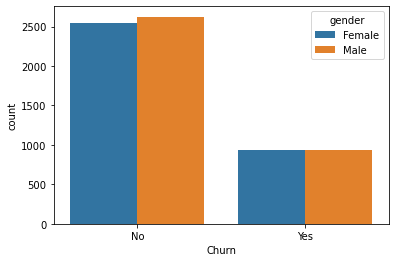

In [14]:
# Is churning more common among male or female?

sns.countplot(x="Churn",hue="gender",data=Tdata)

In [15]:
## categorical columns that are binary 
Binary_class = Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() == 2].keys().tolist()
print(Binary_class)

print("----------------------------------")
print("----------------------------------")

## categorical columns that are multi-class 
Multi_class =  Tdata[Cat_Cols].nunique()[Tdata[Cat_Cols].nunique() > 2].keys().tolist()
print(Multi_class)

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
----------------------------------
----------------------------------
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


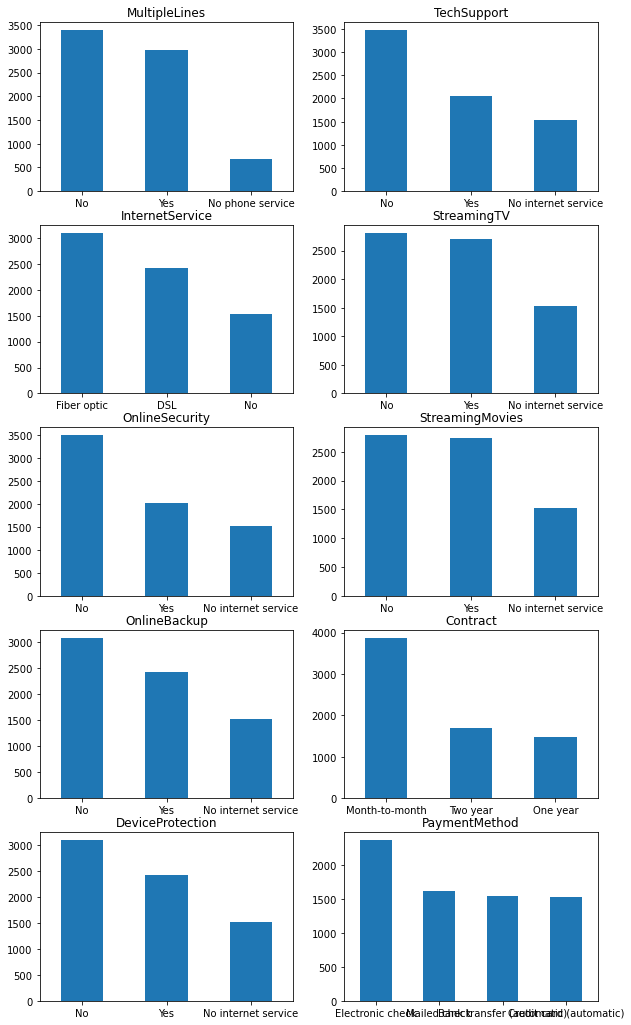

In [16]:
# Multi class variable distribution...plots vertically, i.e columns wise
fig, axes = plt.subplots(nrows = 5 , ncols = 2, figsize = (10,18))

for i, item in enumerate(Multi_class):
    if i < 5:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=5 and i < 10:
        ax = Tdata[item].value_counts().plot(kind = 'bar',ax=axes[i-5,1],rot = 0)
        
    
    ax.set_title(item)

In [17]:
# Feature Engineering on the binary_class categorical columns

# Label encoding the binary columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Binary_class:
    Tdata[i]=le.fit_transform(Tdata[i])

In [18]:
Tdata[Binary_class].shape

(7043, 6)

In [19]:
Tdata[Binary_class].head()  ## All Yes -> 1 , all No -> 0

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


In [20]:
# Feature Engineering on the multi_class categorical columns 
# One hot encoding

Tdata_Dummy = pd.get_dummies(Tdata[Multi_class])
Tdata_Dummy.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [21]:
# concating 3 parts of dataframes -> Numerical, Label_Encoded_Binary_Features,  One_hot_encoded_Multi_Class_Features

final_df = pd.concat([Tdata[Num_Cols],Tdata[Binary_class],Tdata_Dummy], axis=1)
final_df.shape

(7043, 41)

0    5174
1    1869
Name: Churn, dtype: int64


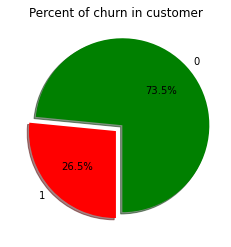

In [22]:
# Percentage of Churn in the network

labels = final_df['Churn'].value_counts(sort = True).index
#print(labels)
sizes = final_df['Churn'].value_counts(sort = True)
print(sizes)

colors = ["green","red"]
explode = (0.1,0)  # only explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)
# pie-chart is drawn in clockwise direction

plt.title('Percent of churn in customer')
plt.show()

In [23]:
# Correlation
Tdata.corr().style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.112851,0.011942
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157676,0.191825
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650468,0.193356
TotalCharges,0.000048,0.102395,0.318812,0.064535,0.824757,0.112851,0.157676,0.650468,1.000000,-0.199428
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199428,1.000000


In [24]:
## Dividing data into Training and testing set
from sklearn.model_selection import train_test_split
X = final_df.drop(['Churn'],axis=1)
y = final_df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 40)
(1409, 40)
(5634,)
(1409,)


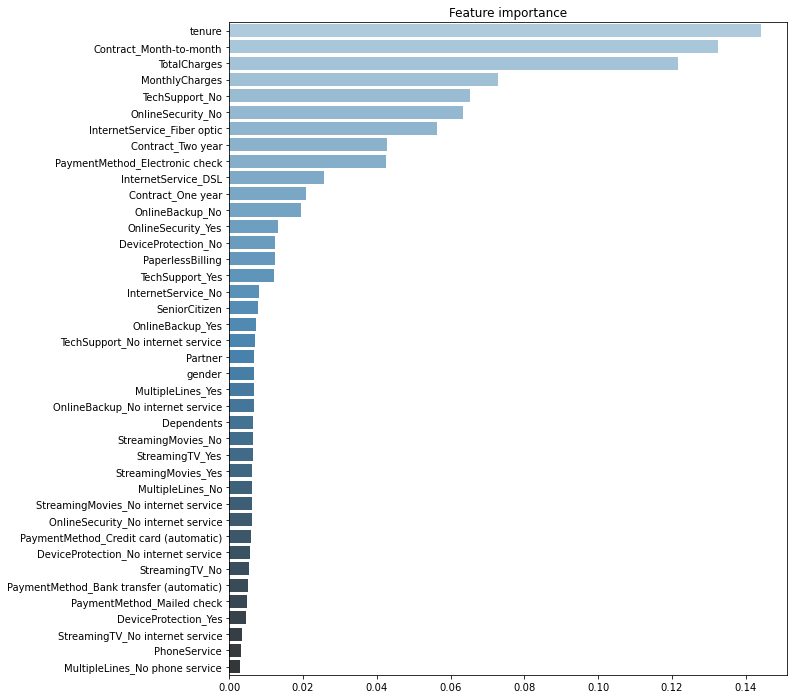

In [26]:
# Feature selection using Random Forest

from sklearn.ensemble import RandomForestClassifier
params={'random_state':0,'n_jobs':-1,'n_estimators':500,'max_depth':8}

clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

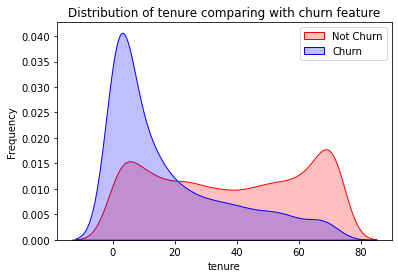

In [27]:
# tenure distibution 
g = sns.kdeplot(final_df.tenure[(final_df["Churn"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(final_df.tenure[(final_df["Churn"] == 1) ], ax =g, color="Blue", shade= True)

g.set_xlabel("tenure")
g.set_ylabel("Frequency")

plt.title('Distribution of tenure comparing with churn feature')

g = g.legend(["Not Churn","Churn"])

### Model - Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [30]:
accuracy = logistic_model.score(X_test, y_test)

print("Logistic Regression accuracy is :",accuracy*100)

from sklearn.metrics import f1_score
f1 = f1_score(logistic_model.predict(X_test), y_test)

print("f1 score = ", f1)

Logistic Regression accuracy is : 81.5471965933286
f1 score =  0.602446483180428


In [33]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_model.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred)

cm_lr

array([[952, 109],
       [151, 197]], dtype=int64)

In [34]:
# Using Grid search CV and L2 Penality for logistic regression

from sklearn.model_selection import GridSearchCV
model_parameters = {
        'C': [1,10,100,1000],
        'class_weight': ['balanced', None]
    }

In [35]:
model = LogisticRegression(penalty='l2')  ## Ridge

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    scoring='f1')

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None]},
             scoring='f1', verbose=1)

In [36]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'C': 10, 'class_weight': 'balanced'}


In [37]:
# Re-fit the model with the best parameters
final_mod = LogisticRegression(**gscv.best_params_)
final_mod.fit(X_train,y_train)

LogisticRegression(C=10, class_weight='balanced')

In [38]:
accuracy = final_mod.score(X_test, y_test)

print("Logistic Regression accuracy is :",accuracy*100)

## Be careful :  Don't depend on accuracy for an unbalanced data
## Instead keep track of f1-score

from sklearn.metrics import f1_score
f1 = f1_score(final_mod.predict(X_test), y_test)

print("f1 score = ", f1)

Logistic Regression accuracy is : 76.15330021291696
f1 score =  0.6307692307692307
